In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def mape_score(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    return mape

In [3]:
def metrics(test, pred):
    d= {}
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(test, pred)
    mape= mape_score(test, pred)

    d['MSE'] = mse
    d['RMSE'] = rmse
    d['R-squared'] = r_squared
    d['MAPE'] = mape
    
    return d
    

In [4]:
# Define the root directory where you want to search for CSV files
root_directory = r'/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators'

# Use the glob library to recursively find CSV files

csv_files = glob.glob(root_directory + '/*.csv', recursive= True)

path_quarterly = csv_files[2]
df_quarterly = pd.read_csv(path_quarterly)

df_quarterly.drop(columns= ['Unnamed: 4'], inplace= True)
df_quarterly['PERIOD'] = pd.to_datetime(df_quarterly['PERIOD'])
df_quarterly.set_index(['PERIOD'], inplace= True)

df_quarterly.sort_index(ascending= True)

df_quarterly.head()

ACTUAL_VALUE  INDICATOR_CODE     INDICATOR_NAME
PERIOD                                                     
2000-03-31          26.7  SAFZAXX01Qa001  Unemployment Rate
2000-06-30          26.7  SAFZAXX01Qa001  Unemployment Rate
2000-09-30          23.3  SAFZAXX01Qa001  Unemployment Rate
2000-12-31          23.3  SAFZAXX01Qa001  Unemployment Rate
2001-03-31          24.6  SAFZAXX01Qa001  Unemployment Rate

In [5]:
for i in csv_files:
    print(i)

/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators/SA_Data_Yearly.csv
/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators/SA_Data_Monthly.csv
/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators/SA_Data_Quarterly.csv


In [6]:
df_quarterly = df_quarterly.pivot_table(index= df_quarterly.index, columns='INDICATOR_NAME', values='ACTUAL_VALUE')

In [7]:
# Original indicators present in quarterly df

len(df_quarterly.columns)

308

In [8]:
# Checking if Real GDP is present as indicator 

import re

# Sample array of words
words = df_quarterly.columns

# Define the regular expression pattern
pattern = r'\bGDP\b'  # \b ensures that "GDP" is a whole word

# Function to check for matches
def find_similar_words(word_list, pattern):
    matches = []
    for word in word_list:
        if re.search(pattern, word, flags=re.IGNORECASE):
            matches.append(word)
    return matches

# Check for words similar to "GDP" in the array
similar_words = find_similar_words(words, pattern)

# Print the matched words
if similar_words:
    print("Words similar to 'GDP' found:")
    for word in similar_words:
        print(word)


Words similar to 'GDP' found:
Annualised GDP s.a. - Agriculture, Forestry and Fishing
Annualised GDP s.a. - Construction
Annualised GDP s.a. - Electricity, Gas and Water
Annualised GDP s.a. - Finance, Real Estate and Business Services
Annualised GDP s.a. - General Government Services
Annualised GDP s.a. - Manufacturing
Annualised GDP s.a. - Mining and Quarrying
Annualised GDP s.a. - Personal Services
Annualised GDP s.a. - Trade, Catering and Accommodation
Annualised GDP s.a. - Transport, Storage and Communication
Current Account to GDP
Nominal GDP - Agriculture, Forestry and Fishing
Nominal GDP - Construction
Nominal GDP - Electricity, Gas and Water
Nominal GDP - Finance, Real Estate and Business Services
Nominal GDP - General Government Services
Nominal GDP - Manufacturing
Nominal GDP - Mining and Quarrying
Nominal GDP - Personal Sevices
Nominal GDP - Taxes less Subsidies on Products
Nominal GDP - Transport, Storage and Communication
Nominal GDP - Wholesale and Retail Trade, Hotels an

In [9]:
# Checking the % of null values in 'Real GDP' column

df_quarterly['Nominal GDP at Market Prices'].isnull().sum() / len(df_quarterly) * 100

54.90196078431373

In [10]:
df_quarterly['Real GDP at Market Prices'].isnull().sum() / len(df_quarterly) * 100

52.54901960784314

In [11]:
# Setting threshold at 55 % NaN (45% values)

cols = [col for col in df_quarterly.columns if (df_quarterly[col].isnull().sum() / len(df_quarterly) * 100) < 55]
len(cols)

90

In [12]:
df_quarterly = df_quarterly[cols]   

# Number of records after dropping the NaN values

df_quarterly.dropna(inplace= True)
print(len(df_quarterly))

106


In [13]:
df_quarterly.head(3)

INDICATOR_NAME  Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
PERIOD                                                                    
1994-03-31                                           64026.620653         
1994-06-30                                           64285.022588         
1994-09-30                                           65254.419647         

INDICATOR_NAME  Annualised GDP s.a. - Construction  \
PERIOD                                               
1994-03-31                            57342.366141   
1994-06-30                            57751.530606   
1994-09-30                            58426.977602   

INDICATOR_NAME  Annualised GDP s.a. - Electricity, Gas and Water  \
PERIOD                                                             
1994-03-31                                          87523.336250   
1994-06-30                                          89086.502788   
1994-09-30                                          89584.140443   

INDICATOR_NAME  Annualised GDP s.a. - Finance, Real Estate and Business Services  \
PERIOD                                                                             
1994-03-31                                          354152.560074                  
1994-06-30                                          359991.380964                  
1994-09-30                                          364604.665397                  

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
1994-03-31                                          227628.430585   
1994-06-30                                          228597.901869   
1994-09-30                                          229647.447559   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
1994-03-31                            337649.493638   
1994-06-30                            339889.100966   
1994-09-30                            345744.630827   

INDICATOR_NAME  Annualised GDP s.a. - Mining and Quarrying  \
PERIOD                                                       
1994-03-31                                   231749.140782   
1994-06-30                                   231938.641217   
1994-09-30                                   231706.983098   

INDICATOR_NAME  Annualised GDP s.a. - Personal Services  \
PERIOD                                                    
1994-03-31                                342888.272293   
1994-06-30                                349376.731168   
1994-09-30                                355656.745711   

INDICATOR_NAME  Annualised GDP s.a. - Trade, Catering and Accommodation  \
PERIOD                                                                    
1994-03-31                                          264449.365227         
1994-06-30                                          265495.709238         
1994-09-30                                          267528.277481         

INDICATOR_NAME  Annualised GDP s.a. - Transport, Storage and Communication  \
PERIOD                                                                       
1994-03-31                                          126106.484297            
1994-06-30                                          127244.410734            
1994-09-30                                          129533.640280            

INDICATOR_NAME  ...  Real GDP - Mining and Quarrying  \
PERIOD          ...                                    
1994-03-31      ...                     57172.719377   
1994-06-30      ...                     57598.249635   
1994-09-30      ...                     58578.505551   

INDICATOR_NAME  Real GDP - Personal Sevices  \
PERIOD                                        
1994-03-31                     84734.885720   
1994-06-30                     87266.832172   
1994-09-30                     89670.909748   

INDICATOR_NAME  Real GDP - Transport, Storage and Communication  \
PERIOD     

In [14]:
df_quarterly.index

DatetimeIndex(['1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30',
               ...
               '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31',
               '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30'],
              dtype='datetime64[ns]', name='PERIOD', length=106, freq=None)

## Pre-Processing

In [15]:
# asdgwadg

In [16]:
# X = df_quarterly.drop(columns= ['Real GDP at Market Prices'])
# y = df_quarterly['Real GDP at Market Prices']

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_quarterly_scaled = sc.fit_transform(df_quarterly)

In [18]:
pd.set_option('display.max_columns', None)

df_quarterly_scaled = pd.DataFrame(df_quarterly_scaled, columns= df_quarterly.columns, index= df_quarterly.index)
df_quarterly_scaled.head()

INDICATOR_NAME  Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
PERIOD                                                                    
1994-03-31                                              -1.031720         
1994-06-30                                              -1.016545         
1994-09-30                                              -0.959618         
1994-12-31                                              -0.649462         
1995-03-31                                              -1.111263         

INDICATOR_NAME  Annualised GDP s.a. - Construction  \
PERIOD                                               
1994-03-31                               -1.286602   
1994-06-30                               -1.275766   
1994-09-30                               -1.257878   
1994-12-31                               -1.235109   
1995-03-31                               -1.217711   

INDICATOR_NAME  Annualised GDP s.a. - Electricity, Gas and Water  \
PERIOD                                                             
1994-03-31                                             -2.067278   
1994-06-30                                             -1.918097   
1994-09-30                                             -1.870606   
1994-12-31                                             -1.849223   
1995-03-31                                             -1.704517   

INDICATOR_NAME  Annualised GDP s.a. - Finance, Real Estate and Business Services  \
PERIOD                                                                             
1994-03-31                                              -1.562449                  
1994-06-30                                              -1.535645                  
1994-09-30                                              -1.514468                  
1994-12-31                                              -1.495864                  
1995-03-31                                              -1.486107                  

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
1994-03-31                                              -1.078865   
1994-06-30                                              -1.059516   
1994-09-30                                              -1.038568   
1994-12-31                                              -1.010429   
1995-03-31                                              -1.013910   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
1994-03-31                                -1.905392   
1994-06-30                                -1.875513   
1994-09-30                                -1.797393   
1994-12-31                                -1.645582   
1995-03-31                                -1.564125   

INDICATOR_NAME  Annualised GDP s.a. - Mining and Quarrying  \
PERIOD                                                       
1994-03-31                                        0.829877   
1994-06-30                                        0.848091   
1994-09-30                                        0.825825   
1994-12-31                                        0.810089   
1995-03-31                                        0.412186   

INDICATOR_NAME  Annualised GDP s.a. - Personal Services  \
PERIOD                                                    
1994-03-31                                    -1.819468   
1994-06-30                                    -1.758695   
1994-09-30                                    -1.699874   
1994-12-31                                    -1.629101   
1995-03-31                                    -1.605947   

INDICATOR_NAME  Annualised GDP s.a. - Trade, Catering and Accommodation  \
PERIOD                                                                    
1994-03-31                                              -1.666281         
1994-06-30                                              -1.656027         
1994-09-30

## 1. Random Forest (Feature Importance)

In [19]:
# Using last 16 records for training

X = df_quarterly_scaled.drop(columns= ['Real GDP at Market Prices'])
y = df_quarterly_scaled['Real GDP at Market Prices']

X_train, y_train = X[:-16], y[:-16]
X_test, y_test = X[-16:], y[-16:]

In [20]:
y_test

PERIOD
2016-09-30    1.209056
2016-12-31    1.304693
2017-03-31    1.067465
2017-06-30    1.253072
2017-12-31    1.396347
2018-03-31    1.142038
2018-06-30    1.303015
2018-09-30    1.417932
2018-12-31    1.511549
2019-03-31    1.176158
2019-06-30    1.363534
2019-09-30    1.427161
2019-12-31    1.482131
2020-03-31    1.215000
2020-06-30    0.340815
2020-09-30    1.070773
Name: Real GDP at Market Prices, dtype: float64

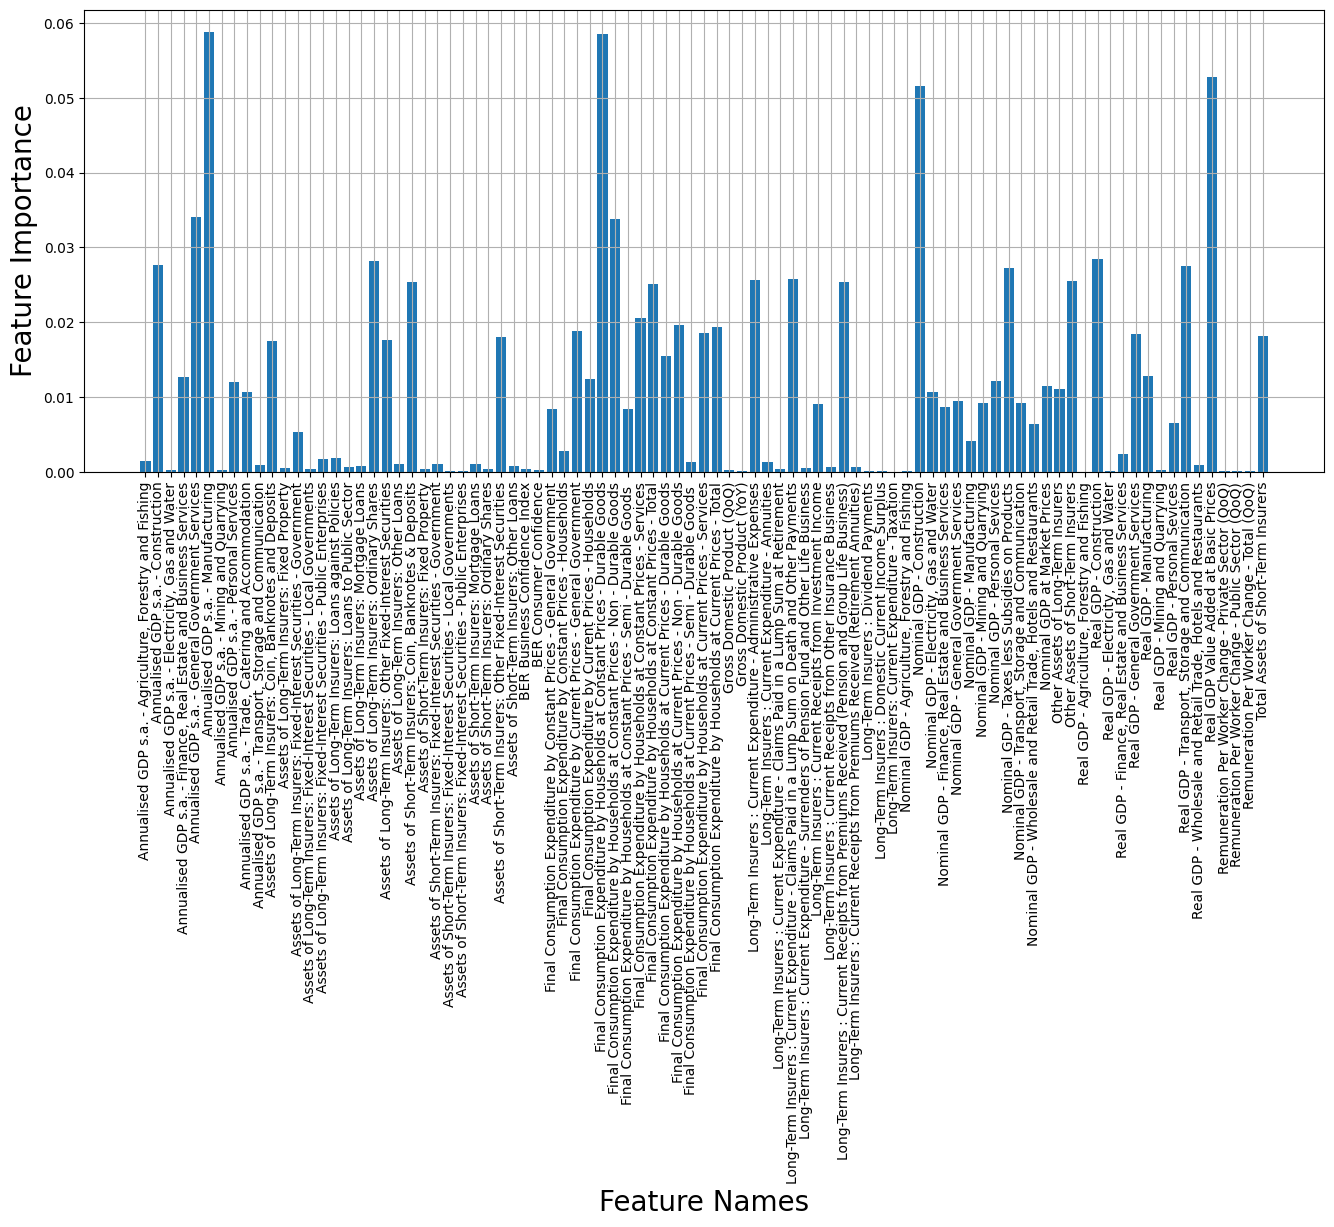

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state= 1)
rf.fit(X_train,y_train)

importances = rf.feature_importances_

# Plot importances
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.xticks(rotation= 'vertical')
plt.bar(X_train.columns, importances)
plt.xlabel('Feature Names', size= 20) 
plt.ylabel('Feature Importance', size= 20)
plt.grid()
plt.show()

In [22]:
df_imp = pd.DataFrame({'Features': X_train.columns, 'importance': importances})
df_imp

Features  importance
0   Annualised GDP s.a. - Agriculture, Forestry an...    0.001395
1                  Annualised GDP s.a. - Construction    0.027685
2    Annualised GDP s.a. - Electricity, Gas and Water    0.000261
3   Annualised GDP s.a. - Finance, Real Estate and...    0.012683
4   Annualised GDP s.a. - General Government Services    0.034079
..                                                ...         ...
84               Real GDP Value Added at Basic Prices    0.052811
85  Remuneration Per Worker Change - Private Secto...    0.000059
86  Remuneration Per Worker Change - Public Sector...    0.000037
87       Remuneration Per Worker Change - Total (QoQ)    0.000059
88                Total Assets of Short-Term Insurers    0.018092

[89 rows x 2 columns]

In [23]:
# Important features using RF having importance > 0.03

rf_imp_features = df_imp[df_imp['importance'] >= 0.03]['Features']
rf_imp_features

4     Annualised GDP s.a. - General Government Services
5                   Annualised GDP s.a. - Manufacturing
36    Final Consumption Expenditure by Households at...
37    Final Consumption Expenditure by Households at...
61                           Nominal GDP - Construction
84                 Real GDP Value Added at Basic Prices
Name: Features, dtype: object

## 2. Pearson Correlation

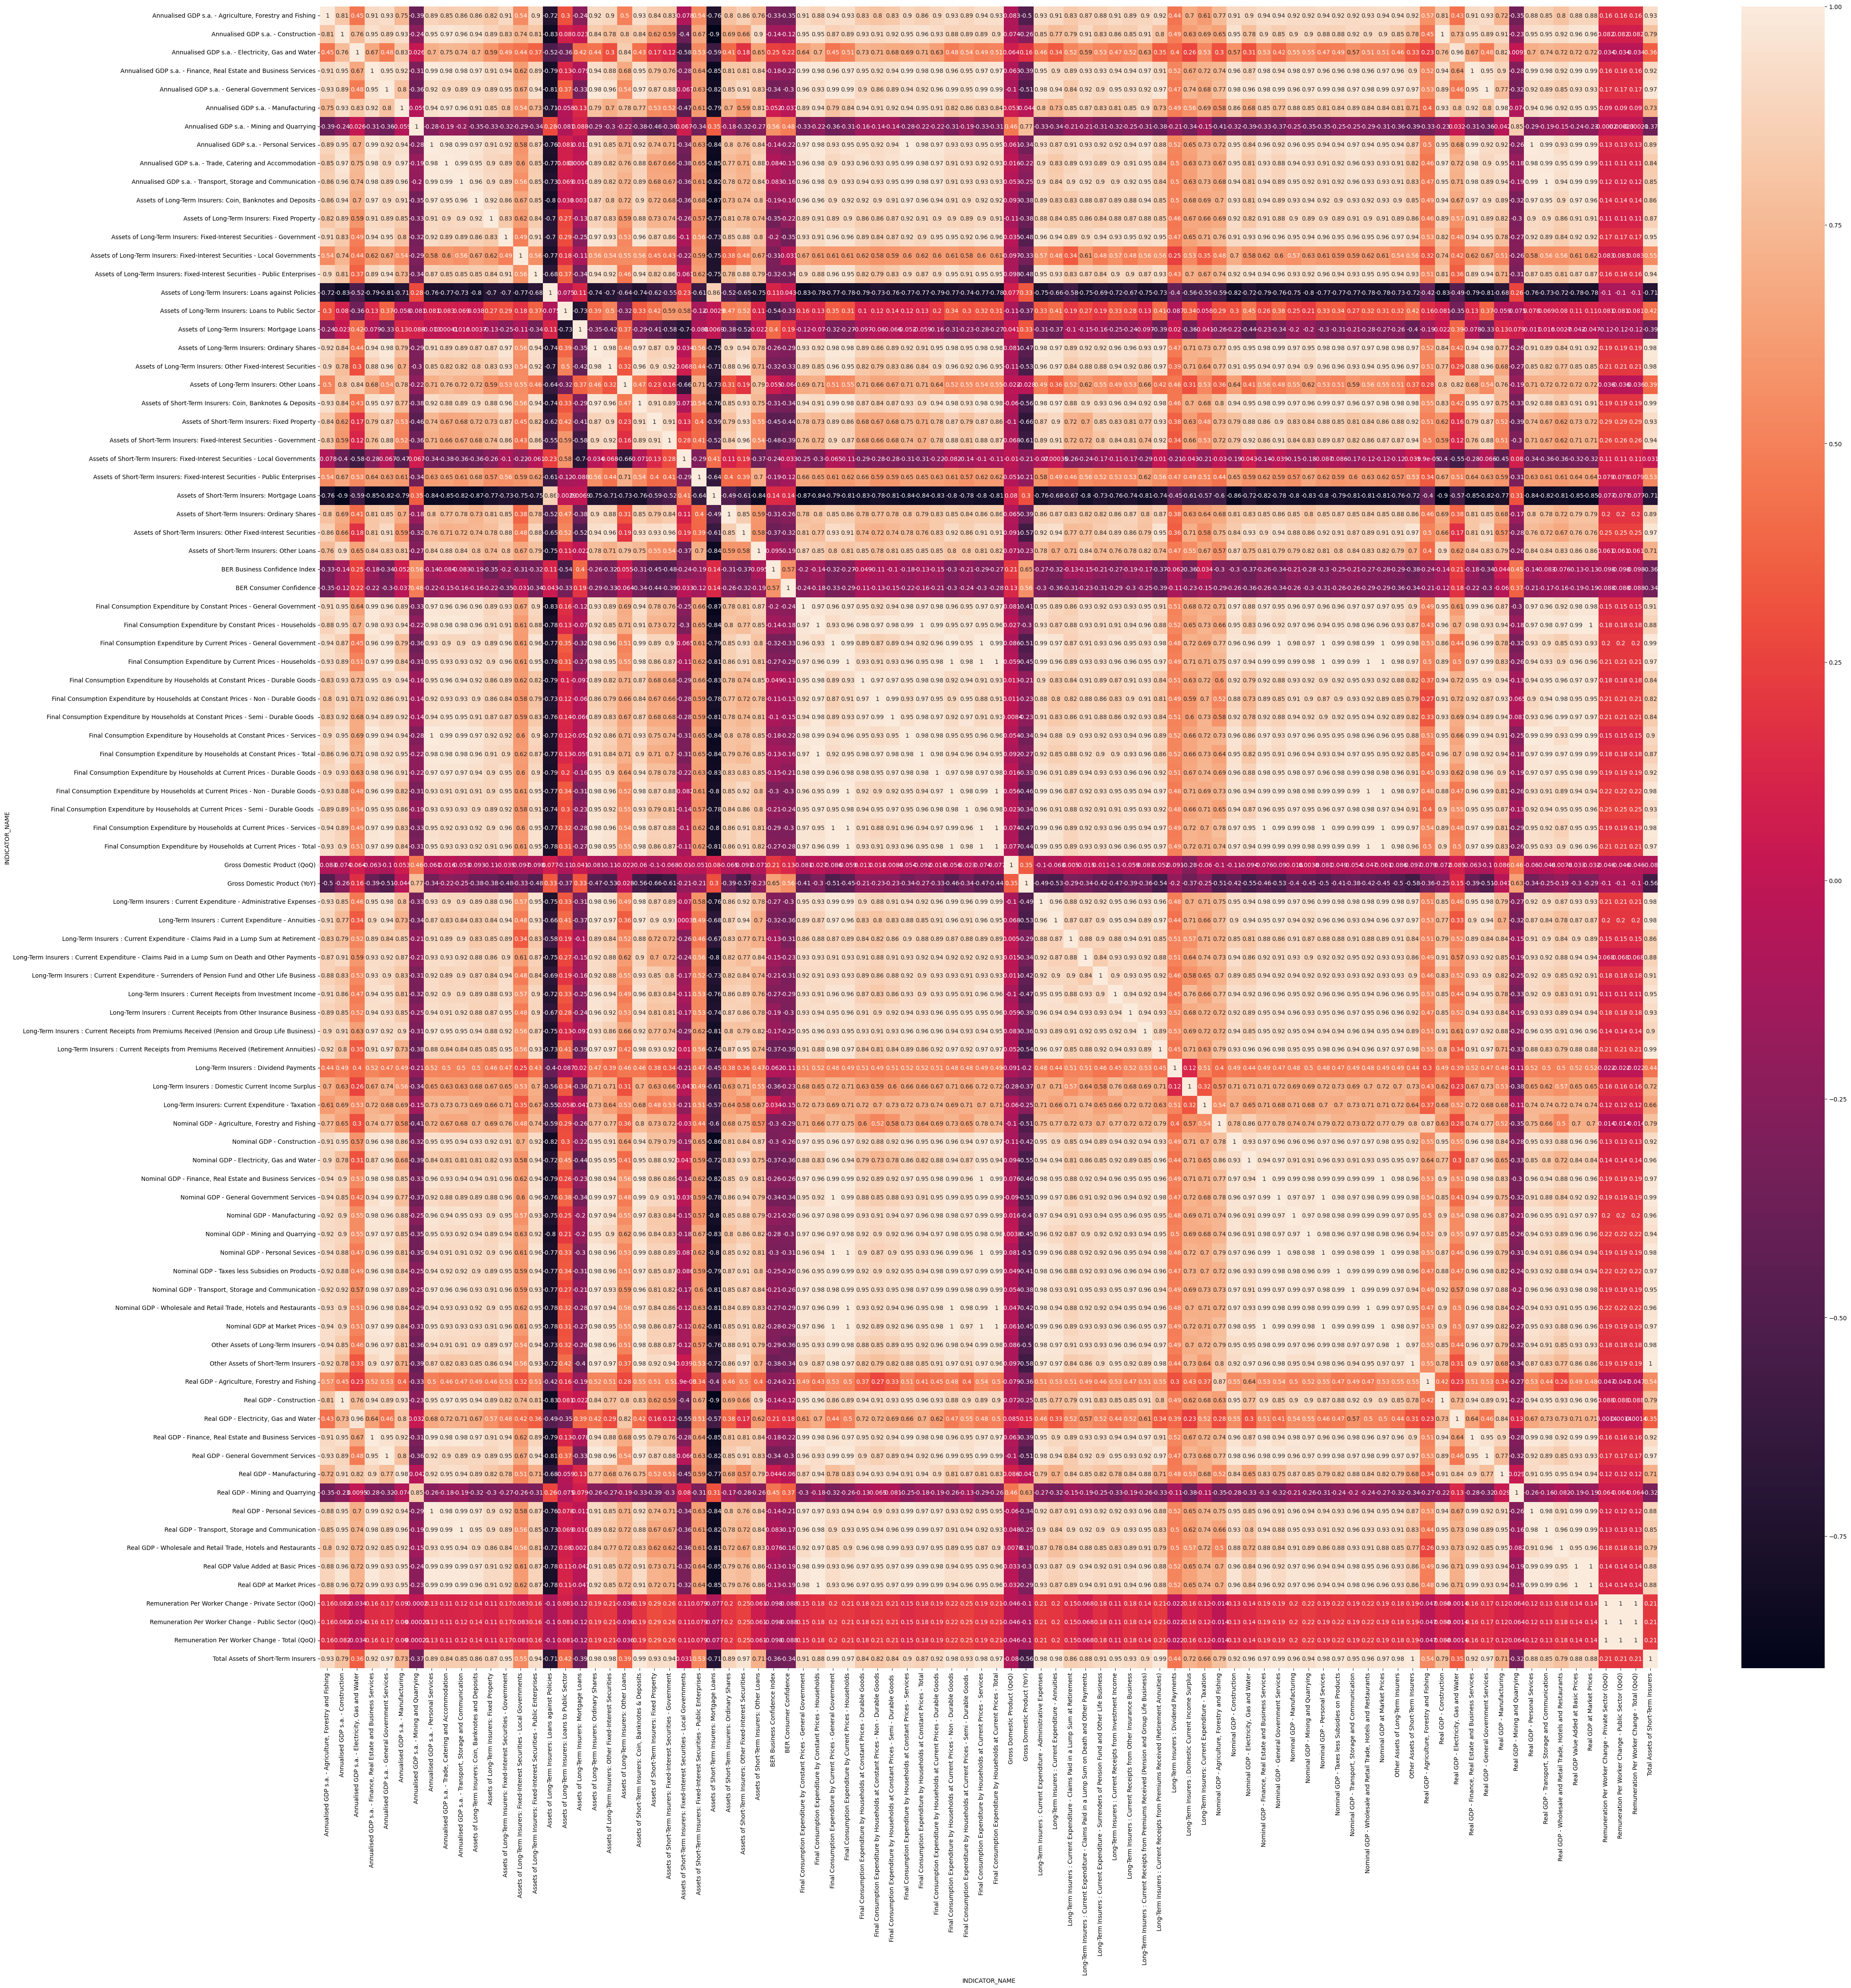

In [64]:
import seaborn as sns

plt.figure(figsize= (50,50))
sns.heatmap(df_quarterly_scaled.corr(), annot= True)
plt.show()

In [25]:
df_quarterly_scaled.corr()


INDICATOR_NAME                                      Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
INDICATOR_NAME                                                                                                
Annualised GDP s.a. - Agriculture, Forestry and...                                           1.000000         
Annualised GDP s.a. - Construction                                                           0.814998         
Annualised GDP s.a. - Electricity, Gas and Water                                             0.453775         
Annualised GDP s.a. - Finance, Real Estate and ...                                           0.910384         
Annualised GDP s.a. - General Government Services                                            0.931447         
...                                                                                               ...         
Real GDP at Market Prices                                                                    0.881761         
Remuneration Per Worker Change - Private Sector...                                           0.163249         
Remuneration Per Worker Change - Public Sector ...                                           0.163282         
Remuneration Per Worker Change - Total (QoQ)                                                 0.163266         
Total Assets of Short-Term Insurers                                                          0.927152         

INDICATOR_NAME                                      Annualised GDP s.a. - Construction  \
INDICATOR_NAME                                                                           
Annualised GDP s.a. - Agriculture, Forestry and...                            0.814998   
Annualised GDP s.a. - Construction                                            1.000000   
Annualised GDP s.a. - Electricity, Gas and Water                              0.762845   
Annualised GDP s.a. - Finance, Real Estate and ...                            0.946147   
Annualised GDP s.a. - General Government Services                             0.891067   
...                                                                                ...   
Real GDP at Market Prices                                                     0.964208   
Remuneration Per Worker Change - Private Sector...                            0.081664   
Remuneration Per Worker Change - Public Sector ...                            0.081679   
Remuneration Per Worker Change - Total (QoQ)                                  0.081675   
Total Assets of Short-Term Insurers                                           0.791729   

INDICATOR_NAME                                      Annualised GDP s.a. - Electricity, Gas and Water  \
INDICATOR_NAME                                                                                         
Annualised GDP s.a. - Agriculture, Forestry and...                                          0.453775   
Annualised GDP s.a. - Construction                                                          0.762845   
Annualised GDP s.a. - Electricity, Gas and Water                                            1.000000   
Annualised GDP s.a. - Finance, Real Estate and ...                                          0.668814   
Annualised GDP s.a. - General Government Services                                           0.475805   
...                                                                                              ...   
Real GDP at Market Prices                                                                   0.718304   
Remuneration Per Worker Change - Private Sector...                                         -0.034062   
Remuneration Per Worker Change - Public Sector ...                                         -0.034094   
Remuneration Per Worker Change - Total (QoQ)                                               -0.034065   
Total Assets of Short-Term Insurers                                                         0.360734   

INDICATOR_NAME                  

In [26]:
# Calculate correlations
correlations = df_quarterly_scaled.corr()

# Set the correlation threshold
threshold = 0.99

# Extract features with correlation higher than the threshold with the target
target_correlations = correlations['Real GDP at Market Prices']
highly_correlated_features = target_correlations[abs(target_correlations) > threshold].index.tolist()

# Remove the target feature from the list (if it's included)
if 'Real GDP at Market Prices' in highly_correlated_features:
    highly_correlated_features.remove('Real GDP at Market Prices')

# Extract the DataFrame with highly correlated features
selected_features_df = df_quarterly_scaled[highly_correlated_features]

In [27]:
# Name of features with correlation higher than 0.99 with Target 

selected_features_df.columns, len(selected_features_df.columns)

(Index(['Annualised GDP s.a. - Personal Services',
        'Annualised GDP s.a. - Trade, Catering and Accommodation',
        'Final Consumption Expenditure by Constant Prices - Households',
        'Final Consumption Expenditure by Households at Constant Prices - Services',
        'Final Consumption Expenditure by Households at Constant Prices - Total',
        'Real GDP - Transport, Storage and Communication',
        'Real GDP Value Added at Basic Prices'],
       dtype='object', name='INDICATOR_NAME'),
 7)

## 3. Recursive Feature Elimination (RFE)

In [28]:
from sklearn.feature_selection import RFE

rf = RandomForestRegressor()

rfe = RFE(rf, n_features_to_select=6) 
rfe.fit(X, y)

feature_ranking = rfe.ranking_

In [29]:
# Getting feature names using RFE (masking)

feature_names = X.columns

selected_features_mask = rfe.support_  # Boolean mask of selected features
rfe_imp_features = [feature_names[i] for i, is_selected in enumerate(selected_features_mask) if is_selected]
rfe_imp_features

['Annualised GDP s.a. - General Government Services',
 'Assets of Long-Term Insurers: Other Fixed-Interest Securities',
 'Final Consumption Expenditure by Constant Prices - Households',
 'Nominal GDP - Construction',
 'Real GDP - Transport, Storage and Communication',
 'Real GDP Value Added at Basic Prices']

In [30]:
len(selected_features_mask)

89

In [31]:
# Getting names of features using 'RFE ranking'

df_rank_rfe = pd.DataFrame({'Features' : X.columns, 'RFE_rank':feature_ranking })


df_rank_rfe[df_rank_rfe['RFE_rank'] <= 10]

Features  RFE_rank
1                  Annualised GDP s.a. - Construction         5
4   Annualised GDP s.a. - General Government Services         1
9   Annualised GDP s.a. - Transport, Storage and C...         8
19  Assets of Long-Term Insurers: Other Fixed-Inte...         1
33  Final Consumption Expenditure by Constant Pric...         1
40  Final Consumption Expenditure by Households at...         7
44  Final Consumption Expenditure by Households at...         2
61                         Nominal GDP - Construction         1
66                 Nominal GDP - Mining and Quarrying        10
69  Nominal GDP - Transport, Storage and Communica...         9
72                 Other Assets of Long-Term Insurers         3
75                            Real GDP - Construction         6
82    Real GDP - Transport, Storage and Communication         1
84               Real GDP Value Added at Basic Prices         1
88                Total Assets of Short-Term Insurers         4

## Comparison of Base and features selected using 'Feature Selection'

### 1. Base Model

In [32]:
# Using last 16 records for training

X = df_quarterly_scaled.drop(columns= ['Real GDP at Market Prices'])
y = df_quarterly_scaled['Real GDP at Market Prices']

X_train, y_train = X[:-16], y[:-16]
X_test, y_test = X[-16:], y[-16:]

In [33]:
y_test.head()

PERIOD
2016-09-30    1.209056
2016-12-31    1.304693
2017-03-31    1.067465
2017-06-30    1.253072
2017-12-31    1.396347
Name: Real GDP at Market Prices, dtype: float64

In [34]:
len(X_train.columns)

89

In [35]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

y_pred_base = rf.predict(X_test)
y_pred_base, y_test

(array([1.16266343, 1.20467754, 1.12089561, 1.16498954, 1.19237479,
        1.16623239, 1.19693097, 1.19805398, 1.20421864, 1.17566577,
        1.18984487, 1.19292331, 1.20000618, 1.1690702 , 0.5952008 ,
        1.03895094]),
 PERIOD
 2016-09-30    1.209056
 2016-12-31    1.304693
 2017-03-31    1.067465
 2017-06-30    1.253072
 2017-12-31    1.396347
 2018-03-31    1.142038
 2018-06-30    1.303015
 2018-09-30    1.417932
 2018-12-31    1.511549
 2019-03-31    1.176158
 2019-06-30    1.363534
 2019-09-30    1.427161
 2019-12-31    1.482131
 2020-03-31    1.215000
 2020-06-30    0.340815
 2020-09-30    1.070773
 Name: Real GDP at Market Prices, dtype: float64)

In [36]:
y_pred_base = pd.Series(y_pred_base, index=y_test.index)
y_pred_base

PERIOD
2016-09-30    1.162663
2016-12-31    1.204678
2017-03-31    1.120896
2017-06-30    1.164990
2017-12-31    1.192375
2018-03-31    1.166232
2018-06-30    1.196931
2018-09-30    1.198054
2018-12-31    1.204219
2019-03-31    1.175666
2019-06-30    1.189845
2019-09-30    1.192923
2019-12-31    1.200006
2020-03-31    1.169070
2020-06-30    0.595201
2020-09-30    1.038951
dtype: float64

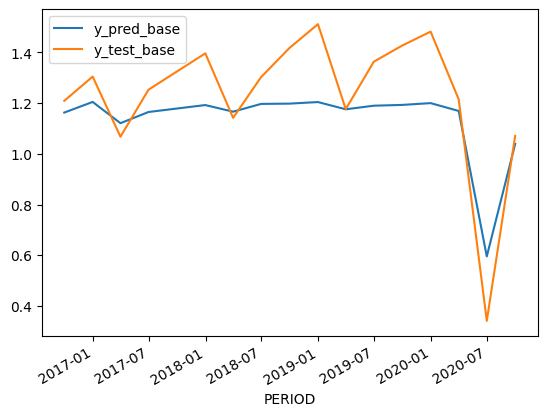

In [37]:
y_pred_base.plot(label= 'y_pred_base')
y_test.plot(label= 'y_test_base')
plt.legend()
plt.show()

In [38]:
rf_base_metrics = metrics(y_test, y_pred_base)
rf_base_metrics

{'MSE': 0.028217194669892136,
 'RMSE': 0.16797974482029712,
 'R-squared': 0.5996486401292676,
 'MAPE': 13.366557937113749}

In [39]:
y_test

PERIOD
2016-09-30    1.209056
2016-12-31    1.304693
2017-03-31    1.067465
2017-06-30    1.253072
2017-12-31    1.396347
2018-03-31    1.142038
2018-06-30    1.303015
2018-09-30    1.417932
2018-12-31    1.511549
2019-03-31    1.176158
2019-06-30    1.363534
2019-09-30    1.427161
2019-12-31    1.482131
2020-03-31    1.215000
2020-06-30    0.340815
2020-09-30    1.070773
Name: Real GDP at Market Prices, dtype: float64

In [40]:
# # y_test = y_test.reshape(-1, 1)
# # y_test= pd.DataFrame(y_test)
# y_test_inverse_transformed = sc.inverse_transform(y_test)
# y_test_inverse_transformed


### 2. Features from 'feature importance' random forest

In [41]:
X_fi_rf = X[rf_imp_features]
X_fi_rf.head()

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
1994-03-31                                              -1.078865   
1994-06-30                                              -1.059516   
1994-09-30                                              -1.038568   
1994-12-31                                              -1.010429   
1995-03-31                                              -1.013910   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
1994-03-31                                -1.905392   
1994-06-30                                -1.875513   
1994-09-30                                -1.797393   
1994-12-31                                -1.645582   
1995-03-31                                -1.564125   

INDICATOR_NAME  Final Consumption Expenditure by Households at Constant Prices - Durable Goods  \
PERIOD                                                                                           
1994-03-31                                              -1.526148                                
1994-06-30                                              -1.421397                                
1994-09-30                                              -1.409520                                
1994-12-31                                              -1.053845                                
1995-03-31                                              -1.409347                                

INDICATOR_NAME  Final Consumption Expenditure by Households at Constant Prices - Non - Durable Goods  \
PERIOD                                                                                                 
1994-03-31                                              -1.796837                                      
1994-06-30                                              -1.686030                                      
1994-09-30                                              -1.667975                                      
1994-12-31                                              -1.171323                                      
1995-03-31                                              -1.479585                                      

INDICATOR_NAME  Nominal GDP - Construction  \
PERIOD                                       
1994-03-31                       -1.146716   
1994-06-30                       -1.147860   
1994-09-30                       -1.166458   
1994-12-31                       -1.160066   
1995-03-31                       -1.113575   

INDICATOR_NAME  Real GDP Value Added at Basic Prices  
PERIOD                                                
1994-03-31                                 -1.729149  
1994-06-30                                 -1.590472  
1994-09-30                                 -1.537660  
1994-12-31                                 -1.492812  
1995-03-31                                 -1.615695

In [42]:
len(X_fi_rf.columns)

6

In [43]:
X_train_rf, y_train_rf = X_fi_rf[:-16], y[:-16]
X_test_rf, y_test_rf = X_fi_rf[-16:], y[-16:]

In [44]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf.predict(X_test_rf)
y_pred_rf, y_test_rf

(array([1.17082845, 1.2197328 , 1.04591265, 1.18480869, 1.23016298,
        1.13997792, 1.19433648, 1.19094135, 1.23289482, 1.16949861,
        1.19120036, 1.2048494 , 1.23516858, 1.1926946 , 0.18402539,
        1.08679984]),
 PERIOD
 2016-09-30    1.209056
 2016-12-31    1.304693
 2017-03-31    1.067465
 2017-06-30    1.253072
 2017-12-31    1.396347
 2018-03-31    1.142038
 2018-06-30    1.303015
 2018-09-30    1.417932
 2018-12-31    1.511549
 2019-03-31    1.176158
 2019-06-30    1.363534
 2019-09-30    1.427161
 2019-12-31    1.482131
 2020-03-31    1.215000
 2020-06-30    0.340815
 2020-09-30    1.070773
 Name: Real GDP at Market Prices, dtype: float64)

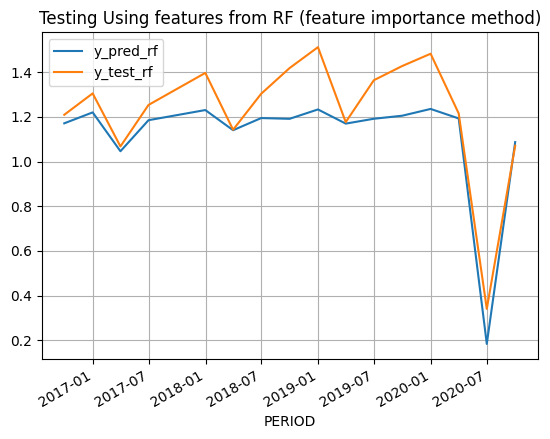

In [45]:
y_pred_rf = pd.Series(y_pred_rf, index= y_test_rf.index)

y_pred_rf.plot(label= 'y_pred_rf')
y_test_rf.plot(label= 'y_test_rf')
plt.legend()
plt.grid()
plt.title('Testing Using features from RF (feature importance method)')
plt.show()

In [46]:
rf_feature_imp_metrics = metrics(y_test_rf, y_pred_rf)
rf_feature_imp_metrics

{'MSE': 0.021743903539845344,
 'RMSE': 0.14745814165330223,
 'R-squared': 0.6914930256917566,
 'MAPE': 10.424232536556028}

### 3. Features from 'Recursive Feature Elimination (RFE)' Random forest

In [47]:
rfe_imp_features

['Annualised GDP s.a. - General Government Services',
 'Assets of Long-Term Insurers: Other Fixed-Interest Securities',
 'Final Consumption Expenditure by Constant Prices - Households',
 'Nominal GDP - Construction',
 'Real GDP - Transport, Storage and Communication',
 'Real GDP Value Added at Basic Prices']

In [48]:
X_rf_rfe = X[rfe_imp_features]
X_rf_rfe

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
1994-03-31                                              -1.078865   
1994-06-30                                              -1.059516   
1994-09-30                                              -1.038568   
1994-12-31                                              -1.010429   
1995-03-31                                              -1.013910   
...                                                           ...   
2019-09-30                                               1.758928   
2019-12-31                                               1.749621   
2020-03-31                                               1.772492   
2020-06-30                                               1.752355   
2020-09-30                                               1.774763   

INDICATOR_NAME  Assets of Long-Term Insurers: Other Fixed-Interest Securities  \
PERIOD                                                                          
1994-03-31                                              -0.865449               
1994-06-30                                              -0.871250               
1994-09-30                                              -0.894391               
1994-12-31                                              -0.880575               
1995-03-31                                              -0.888079               
...                                                           ...               
2019-09-30                                               1.987909               
2019-12-31                                               2.111990               
2020-03-31                                               1.891280               
2020-06-30                                               1.998660               
2020-09-30                                               1.889524               

INDICATOR_NAME  Final Consumption Expenditure by Constant Prices - Households  \
PERIOD                                                                          
1994-03-31                                              -1.706164               
1994-06-30                                              -1.617669               
1994-09-30                                              -1.608913               
1994-12-31                                              -1.376184               
1995-03-31                                              -1.562041               
...                                                           ...               
2019-09-30                                               1.391625               
2019-12-31                                               1.808831               
2020-03-31                                               1.376572               
2020-06-30                                               0.316997               
2020-09-30                                               1.133174               

INDICATOR_NAME  Nominal GDP - Construction  \
PERIOD                                       
1994-03-31                       -1.146716   
1994-06-30                       -1.147860   
1994-09-30                       -1.166458   
1994-12-31                       -1.160066   
1995-03-31                       -1.113575   
...                                    ...   
2019-09-30                        1.449000   
2019-12-31                        1.381673   
2020-03-31                        1.368764   
2020-06-30                        0.807031   
2020-09-30                        0.879756   

INDICATOR_NAME  Real GDP - Transport, Storage and Communication  \
PERIOD                                                            
1994-03-31                                            -1.822130   
1994-06-30                                            -1.851672   
1994-09-30                                            -1.734140   
1994-12-31                                            -1.700

In [49]:
len(X_rf_rfe.columns)

6

In [50]:
X_train_rf_rfe, y_train_rf_rfe = X_rf_rfe[:-16], y[:-16]
X_test_rf_rfe, y_test_rf_rfe = X_rf_rfe[-16:], y[-16:]

In [51]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train_rf_rfe, y_train_rf_rfe)

y_pred_rf_rfe = rf.predict(X_test_rf_rfe)
y_pred_rf_rfe, y_test_rf_rfe

(array([1.19581911, 1.24419751, 1.07010651, 1.20825687, 1.24451237,
        1.17080051, 1.22831143, 1.23321116, 1.24327708, 1.18708631,
        1.24111823, 1.24327708, 1.24451237, 1.21592844, 0.48104185,
        0.96871047]),
 PERIOD
 2016-09-30    1.209056
 2016-12-31    1.304693
 2017-03-31    1.067465
 2017-06-30    1.253072
 2017-12-31    1.396347
 2018-03-31    1.142038
 2018-06-30    1.303015
 2018-09-30    1.417932
 2018-12-31    1.511549
 2019-03-31    1.176158
 2019-06-30    1.363534
 2019-09-30    1.427161
 2019-12-31    1.482131
 2020-03-31    1.215000
 2020-06-30    0.340815
 2020-09-30    1.070773
 Name: Real GDP at Market Prices, dtype: float64)

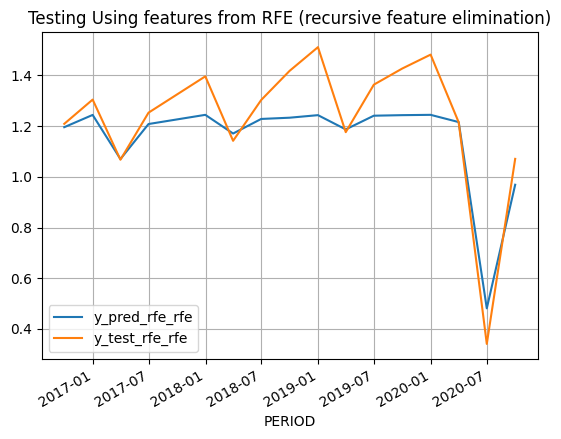

In [52]:
y_pred_rf_rfe = pd.Series(y_pred_rf_rfe, index= y_test_rf_rfe.index)

y_pred_rf_rfe.plot(label= 'y_pred_rfe_rfe')
y_test_rf_rfe.plot(label= 'y_test_rfe_rfe')
plt.legend()
plt.grid()
plt.title('Testing Using features from RFE (recursive feature elimination)')
plt.show()

In [53]:
rfe_metrics = metrics(y_test_rf_rfe, y_pred_rf_rfe)
rfe_metrics

{'MSE': 0.017304112217603654,
 'RMSE': 0.13154509575656423,
 'R-squared': 0.7544856978619037,
 'MAPE': 9.314573134757353}

In [54]:
rf_feature_imp_metrics

{'MSE': 0.021743903539845344,
 'RMSE': 0.14745814165330223,
 'R-squared': 0.6914930256917566,
 'MAPE': 10.424232536556028}

In [55]:
rf_base_metrics

{'MSE': 0.028217194669892136,
 'RMSE': 0.16797974482029712,
 'R-squared': 0.5996486401292676,
 'MAPE': 13.366557937113749}

In [56]:
df_quarterly.tail()

INDICATOR_NAME  Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
PERIOD                                                                    
2019-09-30                                          109771.507763         
2019-12-31                                          110099.737133         
2020-03-31                                          121570.168547         
2020-06-30                                          117002.325211         
2020-09-30                                          117565.849756         

INDICATOR_NAME  Annualised GDP s.a. - Construction  \
PERIOD                                               
2019-09-30                           138844.683500   
2019-12-31                           137548.583950   
2020-03-31                           134012.421865   
2020-06-30                            97278.721657   
2020-09-30                           111582.859101   

INDICATOR_NAME  Annualised GDP s.a. - Electricity, Gas and Water  \
PERIOD                                                             
2019-09-30                                         107008.011216   
2019-12-31                                         105530.998966   
2020-03-31                                         104847.955803   
2020-06-30                                          92073.966405   
2020-09-30                                         103739.316456   

INDICATOR_NAME  Annualised GDP s.a. - Finance, Real Estate and Business Services  \
PERIOD                                                                             
2019-09-30                                           1.021998e+06                  
2019-12-31                                           1.044824e+06                  
2020-03-31                                           1.072244e+06                  
2020-06-30                                           9.586253e+05                  
2020-09-30                                           1.020940e+06                  

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
2019-09-30                                          369811.397082   
2019-12-31                                          369345.112702   
2020-03-31                                          370491.042096   
2020-06-30                                          369482.081182   
2020-09-30                                          370604.817831   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
2019-09-30                            554432.668760   
2019-12-31                            549638.627315   
2020-03-31                            542567.249868   
2020-06-30                            371710.064065   
2020-09-30                            505720.438350   

INDICATOR_NAME  Annualised GDP s.a. - Mining and Quarrying  \
PERIOD                                                       
2019-09-30                                   220771.274739   
2019-12-31                                   223088.842056   
2020-03-31                                   213001.207584   
2020-06-30                                   147060.261049   
2020-09-30                                   213405.733547   

INDICATOR_NAME  Annualised GDP s.a. - Personal Services  \
PERIOD                                                    
2019-09-30                                683433.253706   
2019-12-31                                682656.224192   
2020-03-31                                684432.449424   
2020-06-30                                638452.120136   
2020-09-30                                667799.423104   

INDICATOR_NAME  Annualised GDP s.a. - Trade, Catering and Accommodation  \
PERIOD                                                                    
2019-09-30                                          559899.848309         
2019-12-31                                          553255.974651         
2020-03-31

In [58]:
df1 = pd.read_csv('/home/vaibhavsharma/Desktop/DS23/hv/Time Series/Pakshal_data_SA/merged_qm_matched_gdp.csv')
df1.head(3)

PERIOD  Apple Mobility  Banking Industry Assets  \
0  1993-03-31             NaN                 273979.0   
1  1993-06-30             NaN                 274257.0   
2  1993-09-30             NaN                 285654.0   

   Banking Industry Assets - SARB  Banking ROA  Banking ROE  Budget Balance  \
0                             NaN          NaN          NaN             NaN   
1                             NaN          NaN          NaN             NaN   
2                             NaN          NaN          NaN             NaN   

   CIPI - Cement  CIPI - Construction bricks and tiles  \
0            NaN                                   NaN   
1            NaN                                   NaN   
2            NaN                                   NaN   

   CIPI - Construction electric motors, generators or transformers  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 

   CIPI - Construction pipes, tubes and fittings  \
0                                            NaN   
1                                            NaN   
2                                            NaN   

   CIPI - Construction stone and sand   \
0                                  NaN   
1                                  NaN   
2                                  NaN   

   CIPI - Construction structural and reinforcing steel  \
0                                                NaN      
1                                                NaN      
2                                                NaN      

   CIPI - Construction tyres  \
0                        NaN   
1                        NaN   
2                        NaN   

   CIPI - Construction, distribution and control equipment  \
0                                                NaN         
1                                                NaN         
2                                                NaN         

   CIPI - Electrical components  \
0                           NaN   
1                           NaN   
2                           NaN   

   CIPI - Machinery for mining, quarrying and construction and parts thereof  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           

   CIPI - Plant and equipment  CPI - Alcoholic Beverages and Tobacco  \
0                         NaN                                 219.55   
1                         NaN                                 220.12   
2                         NaN                                 223.03   

   CPI - All Goods (YoY)   CPI - Appliances, Tableware and Equipment (YoY)  \
0                     NaN                                              NaN   
1                     NaN                                              NaN   
2                     NaN                                              NaN   

   CPI - Bread and Cereals (YoY)  CPI - Clothing and Footwear  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   

   CPI - Communication  CPI - Durable Goods (YoY)   CPI - Education  \
0                  NaN                         NaN              NaN   
1                  NaN                         NaN              NaN   
2                  NaN                         NaN              NaN   

   CPI - Electricity and Other Fuels  CPI - Financial Services  \
0                                NaN                       NaN   
1                                NaN                       NaN   
2                                NaN                       NaN   

   CPI - Food and Non-Alcoholic Beverages  \
0                             

In [59]:
df1.shape

(121, 951)

In [61]:
df1.isnull().sum() / len(df1) * 100

PERIOD                                                       0.000000
Apple Mobility                                              95.041322
Banking Industry Assets                                     10.743802
Banking Industry Assets - SARB                              73.553719
Banking ROA                                                 72.727273
                                                              ...    
Unemployment Rate by Province - North West                  51.239669
Unemployment Rate by Province - Northern Cape               51.239669
Unemployment Rate by Province - Western Cape                51.239669
Unemployment Total                                          54.545455
Utilisation of Production Capacity - Total manufacturing    44.628099
Length: 951, dtype: float64